### Importing Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the Dataset

In [30]:
df = pd.read_csv(r"C:/Users/KIIT/Desktop/S_P 500 Historical Data.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 30, 2011","1,257.60","1,262.82","1,264.12","1,257.46",-,-0.43%
1,"Dec 29, 2011","1,263.02","1,249.75","1,263.54","1,249.75",-,1.07%
2,"Dec 28, 2011","1,249.64","1,265.38","1,265.85","1,248.64",-,-1.25%
3,"Dec 27, 2011","1,265.43","1,265.02","1,269.37","1,262.30",-,0.01%
4,"Dec 23, 2011","1,265.33","1,254.00","1,265.42","1,254.00",-,0.90%
...,...,...,...,...,...,...,...
2974,"Mar 07, 2000","1,355.60","1,391.30","1,399.60","1,349.60",-,-2.57%
2975,"Mar 06, 2000","1,391.30","1,409.20","1,409.80","1,384.80",-,-1.27%
2976,"Mar 03, 2000","1,409.20","1,381.80","1,410.90","1,381.80",-,1.98%
2977,"Mar 02, 2000","1,381.80","1,379.20","1,386.90","1,370.30",-,0.19%


In [31]:
# Extracting Year from Date
a = []
for i in range(len(df)):
    a.append(int(df['Date'][i][-4:]))
    
df['Year'] = a

# Sort the Dataset in Time-Series
df = df.sort_values(by='Year')
df

,Date,Price,Open,High,Low,Vol.,Change %,Year
2978,"Mar 01, 2000","1,379.20","1,366.40","1,383.00","1,366.40",-,0.94%,2000
2842,"Sep 13, 2000","1,484.90","1,482.00","1,487.40","1,474.00",-,0.20%,2000
2841,"Sep 14, 2000","1,480.90","1,484.90","1,494.30","1,476.80",-,-0.27%,2000
2840,"Sep 15, 2000","1,465.80","1,480.90","1,481.00","1,460.20",-,-1.02%,2000
2839,"Sep 18, 2000","1,444.50","1,465.80","1,467.90","1,441.80",-,-1.45%,2000
...,...,...,...,...,...,...,...,...
162,"May 11, 2011","1,342.08","1,354.51","1,354.51","1,336.36",-,-1.11%,2011
161,"May 12, 2011","1,348.65","1,339.39","1,351.05","1,332.03",-,0.49%,2011
160,"May 13, 2011","1,337.77","1,348.69","1,350.47","1,333.36",-,-0.81%,2011
173,"Apr 26, 2011","1,347.24","1,336.75","1,349.55","1,336.75",-,0.90%,2011


In [32]:
# Data-Type of Each column
df.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
Year         int64
dtype: object

In [33]:
# Converting the Data-Type of necessary Column from object to Float
for i in range(len(df)):
    df['Change %'][i] = float(df['Change %'][i].replace('%',''))

df = df.astype({'Change %' : float})

<ipython-input-33-bb9107127f14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Change %'][i] = float(df['Change %'][i].replace('%',''))


In [34]:
for i in ['Price', 'Open', 'High', 'Low']:
    for j in range(len(df)):
        df[i][j] = float(df[i][j].replace(',',''))
        
a = {'Price':float, 'Open':float, 'High':float, 'Low':float}
df = df.astype(a)

<ipython-input-34-70ed099f8772>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j] = float(df[i][j].replace(',',''))


In [35]:
# Converted Data-Types
df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %    float64
Year          int64
dtype: object

### Splitting Into Training Set and Test Set

In [40]:
df_train = df[:2300]
df_test = df[2300:]

### Trading Signal of Low and High

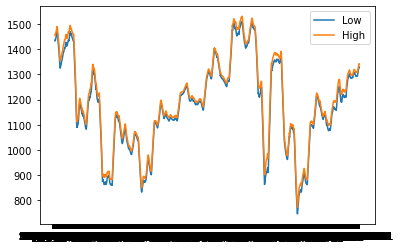

In [36]:
a = df['High'].rolling(30).mean()
c = df['Low'].rolling(30).mean()
plt.plot(df['Date'],c)
plt.plot(df['Date'],a)
plt.legend(['Low','High'])
plt.show()

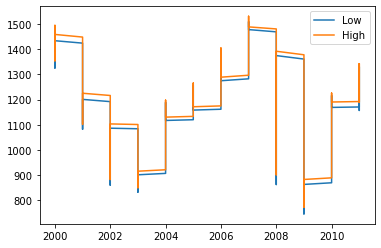

In [37]:
a = df['High'].rolling(30).mean()
c = df['Low'].rolling(30).mean()
plt.plot(df['Year'],c)
plt.plot(df['Year'],a)
plt.legend(['Low','High'])
plt.show()

### Description of Training and Test Set (Standard Deviation, Mean etc..)

In [55]:
df_train.drop(columns=['Price','Open','Change %','Year']).describe()

,High,Low
count,2300.000000,2300.000000
mean,1212.689270,1195.151591
std,186.854437,187.355886
min,798.500000,741.020000
25%,1095.065000,1078.700000
50%,1210.270000,1197.300000
75%,1365.492500,1341.702500
max,1576.090000,1555.460000


In [56]:
df_test.drop(columns=['Price','Open','Change %','Year']).describe()

,High,Low
count,679.000000,679.000000
mean,1137.649293,1119.447850
std,157.678338,160.261376
min,695.270000,666.790000
25%,1080.410000,1062.875000
50%,1164.550000,1140.130000
75%,1260.525000,1243.535000
max,1370.580000,1358.690000


### Strategy 

### Cumulative return is the total change in the price of an investment over a set time period. It is an aggregate figure, not an annualized rate.

#### Train and Test Datset

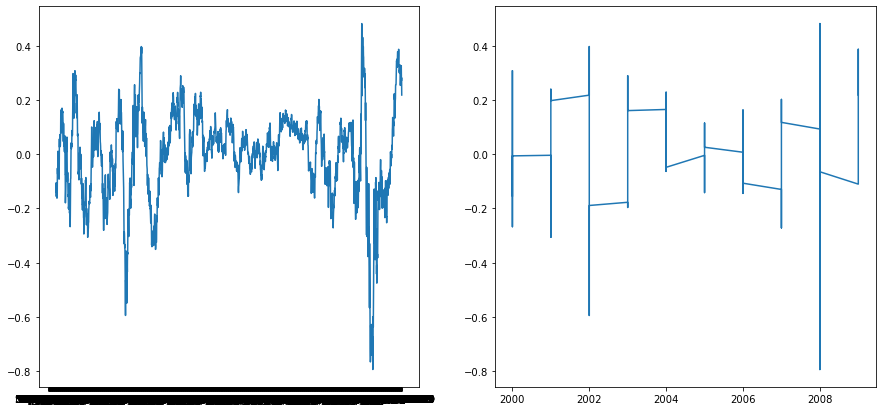

In [49]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(df_train['Date'],df_train['Change %'].rolling(50).mean())
plt.subplot(1,2,2)
plt.plot(df_train['Year'],df_train['Change %'].rolling(50).mean())
plt.show()

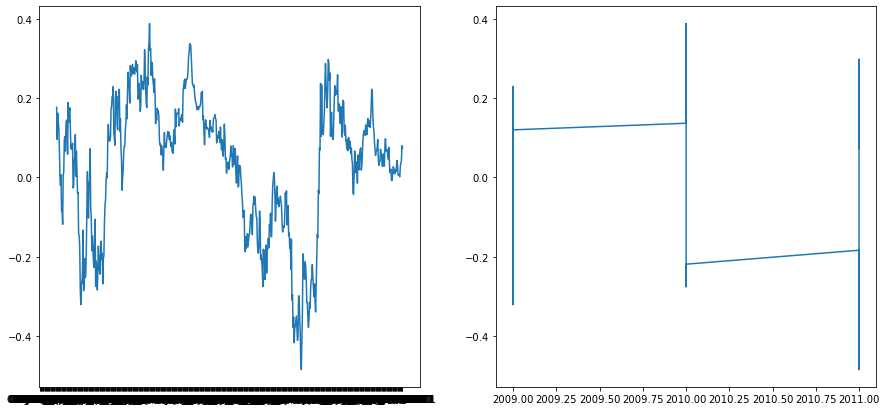

In [50]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(df_test['Date'],df_test['Change %'].rolling(50).mean())
plt.subplot(1,2,2)
plt.plot(df_test['Year'],df_test['Change %'].rolling(50).mean())
plt.show()

In [52]:
print("Average Cummalative Change(Training Set) : ",df_train['Change %'].mean())
print("Average Cummalative Change(Test Set) : ",df_test['Change %'].mean())

Average Cummalative Change(Training Set) :  -0.0027347826086956684
Average Cummalative Change(Test Set) :  0.038645066273932174


### Total Trades

In [53]:
print("Total number of Trades : ",len(df))

Total number of Trades :  2979
